# 擬態問題

In [31]:
import numpy as np
from genetic_algorithm import GeneticAlgorithm

In [32]:
# ターゲットとなる色（8ビットの二進数）
target_color = '00110011'
bools = ['0', '1']

# 適応度関数
def fitness(ind):
    # `ind` を二進数の文字列に変換
    ind_str = ''.join(ind)
    # ターゲットとの一致度を評価
    matches = sum(1 for i, j in zip(ind_str, target_color) if i == j)
    return matches


In [33]:
# GAのインスタンス化
# pop_sizeは偶数
ga = GeneticAlgorithm(pop_size=24, gene_elements=bools, gene_length=8, generations=10, fitness_func=fitness)

In [34]:
import matplotlib.pyplot as plt
import math

def draw_generations(target, population):
    # ターゲットカラーのRGB変換
    target_rgb = [int(target[i:i+2], 2) / 3 for i in range(0, 8, 2)]
    
    # プロットの行列サイズを計算（ターゲット + 集団の個体数）
    n = len(population) + 1
    cols = math.ceil(math.sqrt(n))  # 列数
    rows = math.ceil(n / cols)      # 行数
    
    # プロット設定
    fig, axes = plt.subplots(rows, cols, figsize=(4,4))
    axes = axes.flatten()  # インデックスでアクセスしやすくするため1次元化

    # ターゲットカラーを最初のサブプロットに描画
    axes[0].imshow([[target_rgb]], aspect='auto')
    axes[0].set_title("Target", fontsize=0.1)
    axes[0].axis('off')
    
    # 集団の各個体の色をマス目上に描画
    for i, ind in enumerate(population):
        ind_rgb = [int(''.join(ind[j:j+2]), 2) / 3 for j in range(0, 8, 2)]
        axes[i + 1].imshow([[ind_rgb]], aspect='auto')
        # axes[i + 1].set_title(f"Individual {i+1}")
        axes[i + 1].axis('off')
    
    # 余分なサブプロットを非表示
    for j in range(len(population) + 1, rows * cols):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

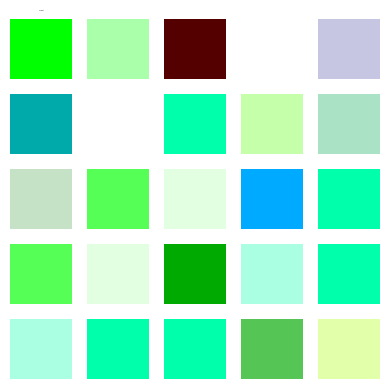

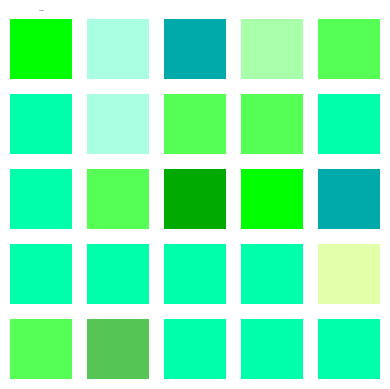

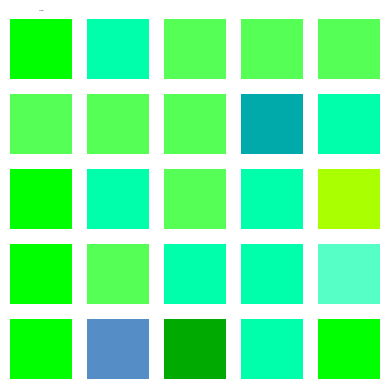

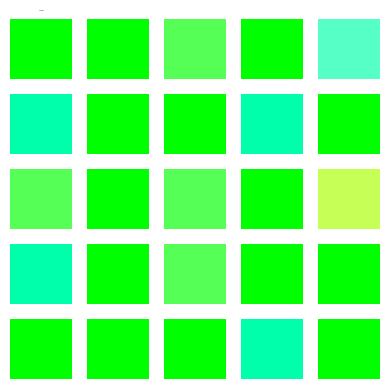

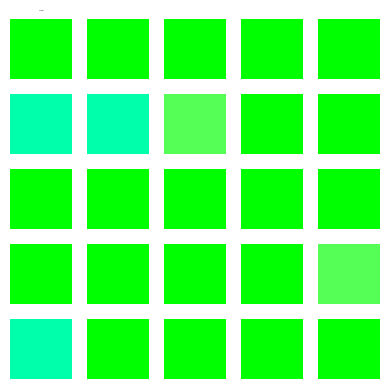

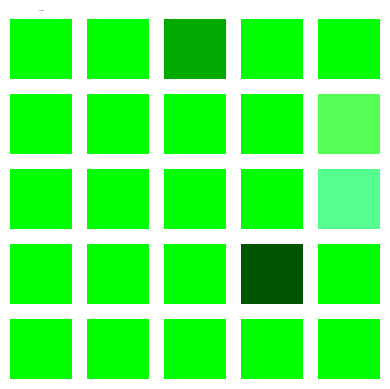

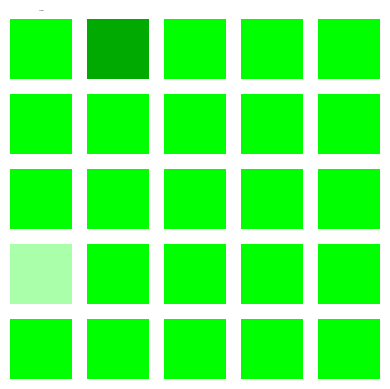

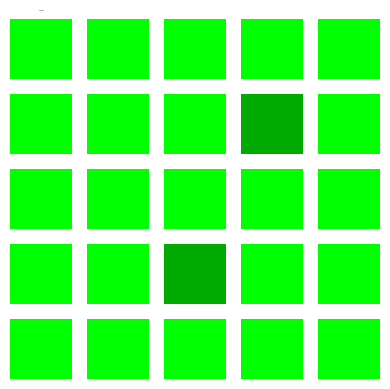

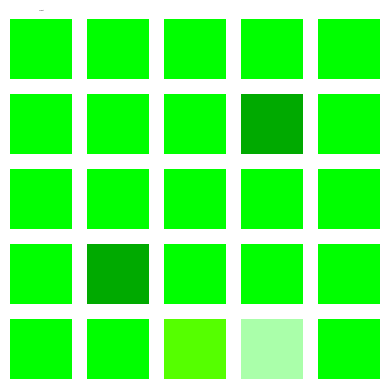

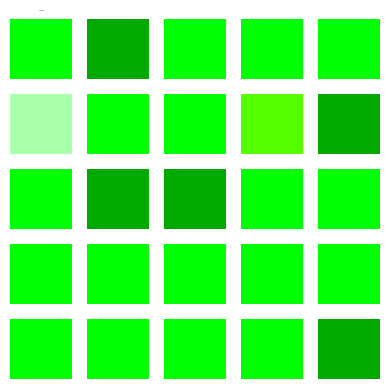

['0' '0' '1' '0' '0' '0' '1' '1'] 8


In [35]:
# 世代ごとの進化を実行
ga.initialize_population()
for generation in range(ga.generations):
    fitness_values = ga.calculate_fitness()
    parents = ga.select_parents(fitness_values)
    offspring = ga.crossover(parents)
    ga.population = ga.mutate(offspring)
    draw_generations(target_color, ga.population)
    # 結果の確認
    best_fitness = np.max(fitness_values)

# 最適解の出力
best_index = np.argmax(fitness_values)
best_individual = ga.population[best_index]
print(best_individual, best_fitness)